In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words="english")

import pickle

import re
import string
import urllib.request
from nltk.corpus import stopwords

In [2]:
df = pickle.load( open("tmdb4700.pkl", "rb"))

In [3]:
df.iloc[0]

id                                                          19995
title                                                      Avatar
popularity                                                150.438
vote_average                                                  7.2
vote_count                                                  11800
runtime                                                       162
release_date                                           2009-12-10
genres              [Action, Adventure, Fantasy, Science Fiction]
keywords        [culture clash, future, space war, space colon...
director                                          [James Cameron]
producer                              [James Cameron, Jon Landau]
screenplay                                        [James Cameron]
writer                                            [James Cameron]
budget                                                  237000000
profit_ratio                                              10.7636
Name: 0, d

Text(0.5, 1.0, 'Distribución de Puntuación')

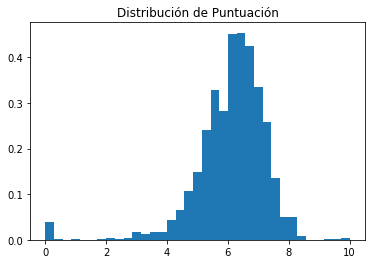

In [4]:
plt.hist(df.vote_average, bins=35, density=True)
plt.title("Distribución de Puntuación")

In [5]:
genres_list     = []
keyword_list    = []
producer_list   = []
director_list   = []
writer_list     = []
screenplay_list = []


def append_to_list(in_list, target_list):
    target_list.extend(in_list)

get_genres_list     = lambda x: append_to_list(x, genres_list)
get_keyword_list    = lambda x: append_to_list(x, keyword_list)
get_producer_list   = lambda x: append_to_list(x, producer_list)
get_director_list   = lambda x: append_to_list(x, director_list)
get_writer_list     = lambda x: append_to_list(x, writer_list)
get_screenplay_list = lambda x: append_to_list(x, screenplay_list)

df.genres.apply(get_genres_list)
genres_set = set(genres_list)

df.keywords.apply(get_keyword_list)
keyword_set = set(keyword_list)

df.producer.apply(get_producer_list)
producer_set = set(keyword_list)

df.director.apply(get_director_list)
director_set = set(director_list)

df.writer.apply(get_writer_list)
writer_set = set(writer_list)

df.screenplay.apply(get_screenplay_list)
screenplay_set = set(screenplay_list)

In [6]:
len(director_set)

2499

In [7]:
len(keyword_set)

9750

In [8]:
len(screenplay_set)

2950

In [9]:
df.genres

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4695                          [Drama, Comedy, Family]
4696                                 [Drama, Romance]
4697                                [Comedy, Romance]
4698                                    [Documentary]
4699                                          [Drama]
Name: genres, Length: 4700, dtype: object

In [10]:
df.genres.str.replace(" ", "_")

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
4695   NaN
4696   NaN
4697   NaN
4698   NaN
4699   NaN
Name: genres, Length: 4700, dtype: float64

In [11]:
def replace_space_by_dash(x):
    aux = []
    for element in x:
        #print(element)
        element_2 = re.sub(r"\s", "_", element)
        aux.append(element_2)
    return ' '.join(aux)

do_the_replacement = lambda x: replace_space_by_dash(x)

In [12]:
replace_space_by_dash( df.genres.iloc[0])

'Action Adventure Fantasy Science_Fiction'

In [13]:
def join_list_into_str(x):
    return ' '.join(x)

genres_list = lambda x: join_list_into_str(x)

In [14]:
df["genres_str"] = df["genres"].apply(do_the_replacement)

In [15]:
df[["vote_average","genres_str"]]

,vote_average,genres_str
0,7.2,Action Adventure Fantasy Science_Fiction
1,6.9,Adventure Fantasy Action
2,6.3,Action Adventure Crime
3,7.6,Action Crime Drama Thriller
4,6.1,Action Adventure Science_Fiction
...,...,...
4695,7.8,Drama Comedy Family
4696,7.4,Drama Romance
4697,6.1,Comedy Romance
4698,0.0,Documentary


In [16]:
data_cv = cv.fit_transform(df["genres_str"])

In [17]:
data_cv

<4700x20 sparse matrix of type '<class 'numpy.int64'>'
	with 11961 stored elements in Compressed Sparse Row format>

In [18]:
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = df.index
data_dtm

,action,adventure,animation,comedy,crime,documentary,drama,family,fantasy,foreign,history,horror,music,mystery,romance,science_fiction,thriller,tv_movie,war,western
0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4695,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4696,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4697,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4698,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
cols = data_dtm.columns.values

In [20]:
for i in cols:
    print(data_dtm[i])

0       1
1       1
2       1
3       1
4       1
       ..
4695    0
4696    0
4697    0
4698    0
4699    0
Name: action, Length: 4700, dtype: int64
0       1
1       1
2       1
3       0
4       1
       ..
4695    0
4696    0
4697    0
4698    0
4699    0
Name: adventure, Length: 4700, dtype: int64
0       0
1       0
2       0
3       0
4       0
       ..
4695    0
4696    0
4697    0
4698    0
4699    0
Name: animation, Length: 4700, dtype: int64
0       0
1       0
2       0
3       0
4       0
       ..
4695    1
4696    0
4697    1
4698    0
4699    0
Name: comedy, Length: 4700, dtype: int64
0       0
1       0
2       1
3       1
4       0
       ..
4695    0
4696    0
4697    0
4698    0
4699    0
Name: crime, Length: 4700, dtype: int64
0       0
1       0
2       0
3       0
4       0
       ..
4695    0
4696    0
4697    0
4698    1
4699    0
Name: documentary, Length: 4700, dtype: int64
0       0
1       0
2       0
3       1
4       0
       ..
4695    1
4696    1
4697

In [21]:
for i in cols:
    print(i, sum(data_dtm[i]) )

action 1146
adventure 790
animation 233
comedy 1689
crime 688
documentary 96
drama 2248
family 509
fantasy 422
foreign 32
history 196
horror 502
music 182
mystery 343
romance 877
science_fiction 524
thriller 1253
tv_movie 6
war 144
western 81


In [22]:
for i in cols:
    print(i, sum(data_dtm[i] * df.vote_average) / sum(data_dtm[i]) )

action 6.002181500872599
adventure 6.15696202531646
animation 6.336480686695276
comedy 5.948904677323857
crime 6.279069767441862
documentary 6.252083333333329
drama 6.40275800711742
family 6.039096267190573
fantasy 6.091469194312798
foreign 6.309375000000001
history 6.716326530612238
horror 5.655378486055775
music 6.346703296703295
mystery 6.176093294460644
romance 6.211516533637415
science_fiction 6.019656488549617
thriller 6.026017557861137
tv_movie 5.133333333333334
war 6.7138888888888895
western 6.254320987654322


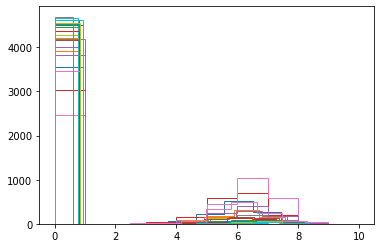

In [23]:
for i in cols:
    plt.hist(data_dtm[i] * df.vote_average, histtype="step")

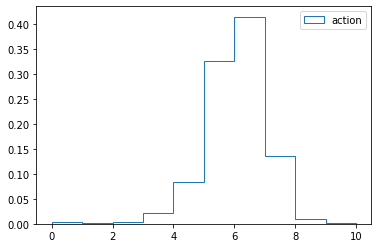

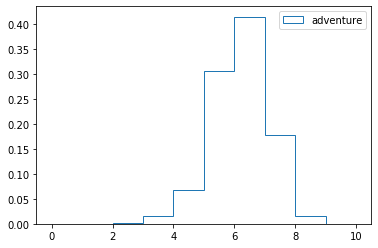

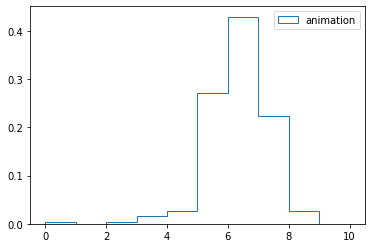

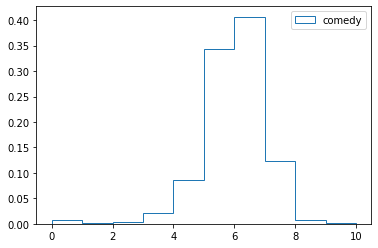

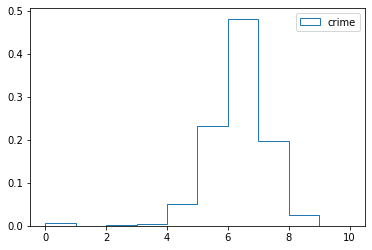

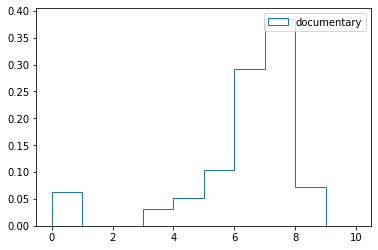

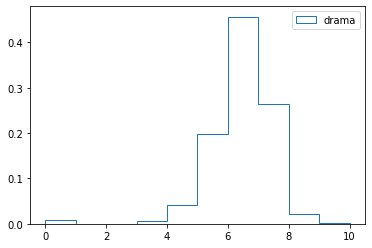

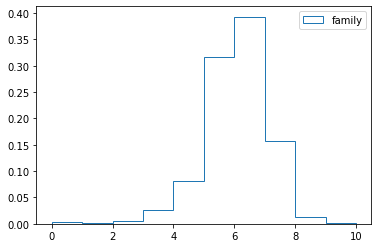

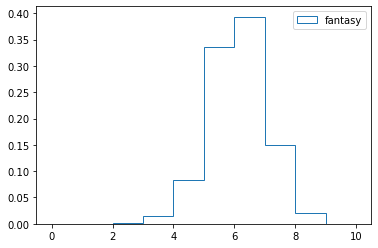

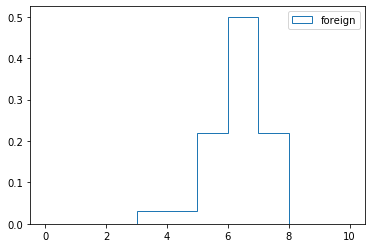

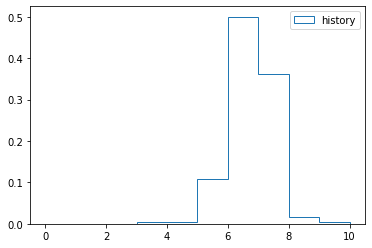

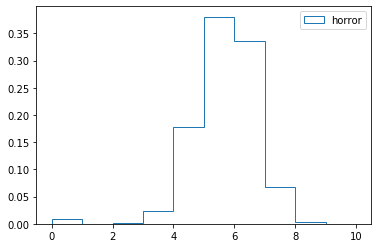

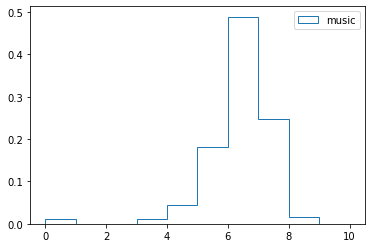

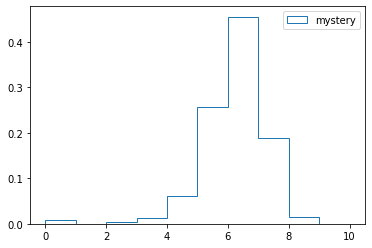

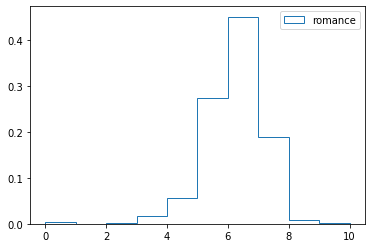

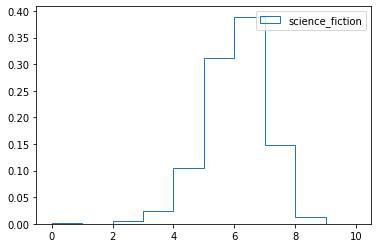

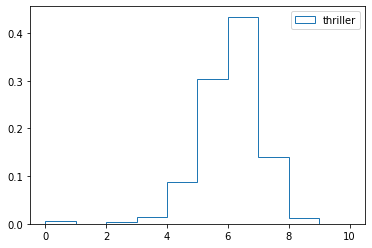

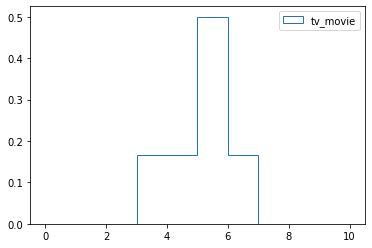

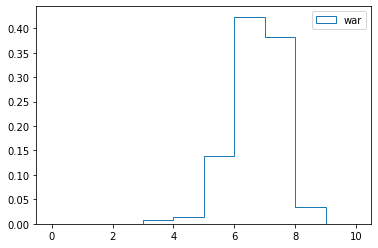

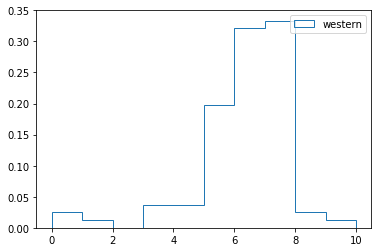

In [24]:
x_scale = np.linspace(0,10,11)

for i in cols:
    fig = plt.figure()
    index = data_dtm[i][ data_dtm[i]> 0].index
    plt.hist(data_dtm[i][index] * df.vote_average[index], 
             density=True,
             histtype="step",
             label=i, bins=x_scale)
    plt.legend(loc=0)

In [25]:
genres_vote_weighted = pd.DataFrame()

for i in cols:
    genres_vote_weighted[i] = data_dtm[i] * df.vote_average

genres_vote_weighted = genres_vote_weighted.replace(0, np.NaN)

In [26]:
meds = genres_vote_weighted.median()

In [27]:
meds.sort_values()

tv_movie           5.10
horror             5.80
comedy             6.00
action             6.10
family             6.10
fantasy            6.10
thriller           6.10
science_fiction    6.10
adventure          6.20
crime              6.30
mystery            6.30
romance            6.30
animation          6.50
drama              6.50
music              6.55
foreign            6.60
western            6.60
history            6.70
war                6.75
documentary        6.90
dtype: float64

In [28]:
genres_vote_weighted = genres_vote_weighted[meds.sort_values().index] 

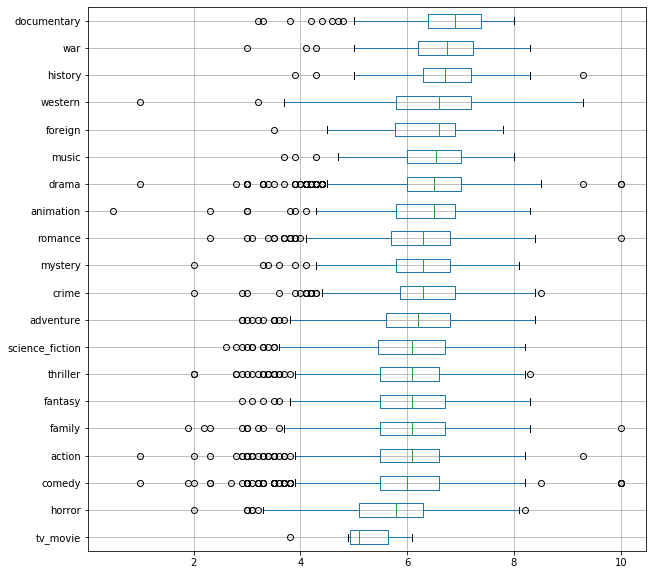

In [29]:
fig = plt.figure(figsize=(10,10,))
genres_vote_weighted.boxplot(vert=False)
plt.savefig("genres_whole_set.png")

In [30]:
df.vote_average.quantile(0.5)

6.2

In [31]:
df.vote_average.quantile(0.75)

6.8

In [32]:
index = df.vote_average > 6.8

In [33]:
index

0        True
1        True
2       False
3        True
4       False
        ...  
4695     True
4696     True
4697    False
4698    False
4699    False
Name: vote_average, Length: 4700, dtype: bool

In [34]:
genres_vote_weighted = pd.DataFrame()

for i in cols:
    genres_vote_weighted[i] = data_dtm[i] * df.vote_average

In [35]:
best_genres = genres_vote_weighted[index]
best_genres = best_genres.replace(0, np.NaN)

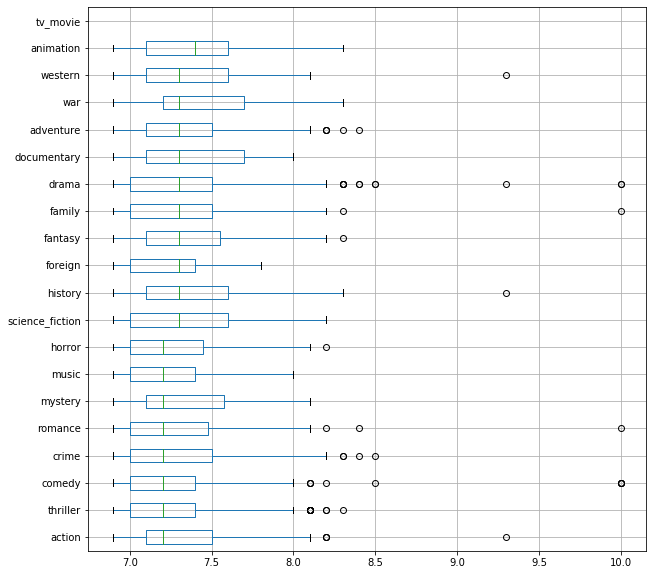

In [36]:
fig = plt.figure(figsize=(10,10))
meds = best_genres.median()
best_genres = best_genres[meds.sort_values().index]

best_genres.boxplot(vert=False)

plt.savefig("genres_3rd_quartile.png")

In [37]:
best_genres_vote_counting = data_dtm[index].sum()

In [38]:
type(best_genres_vote_counting)

pandas.core.series.Series

In [39]:
best_genres_vote_counting

action             193
adventure          175
animation           63
comedy             266
crime              175
documentary         49
drama              752
family             105
fantasy             83
foreign              9
history             83
horror              47
music               57
mystery             78
romance            214
science_fiction    101
thriller           223
tv_movie             0
war                 65
western             33
dtype: int64

In [40]:
best_genres_vote_counting.index

Index(['action', 'adventure', 'animation', 'comedy', 'crime', 'documentary',
       'drama', 'family', 'fantasy', 'foreign', 'history', 'horror', 'music',
       'mystery', 'romance', 'science_fiction', 'thriller', 'tv_movie', 'war',
       'western'],
      dtype='object')

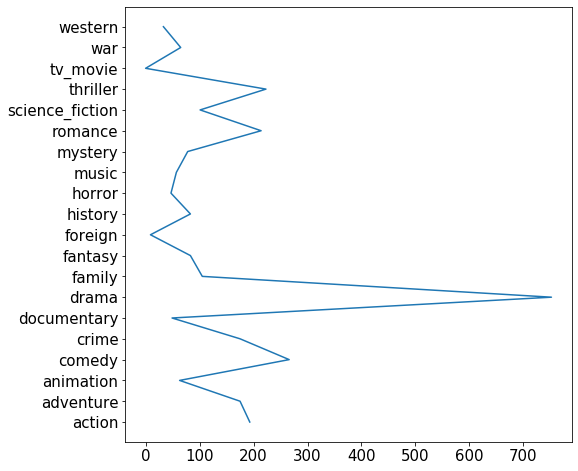

In [41]:
fig = plt.figure(figsize=(8,8))
plt.plot(best_genres_vote_counting, best_genres_vote_counting.index)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.savefig("genres_3rd_quartile_vote_counting.png")

In [42]:
df[index]

,id,title,popularity,vote_average,vote_count,runtime,release_date,genres,keywords,director,producer,screenplay,writer,budget,profit_ratio,genres_str
0,19995,Avatar,150.437577,7.2,11800,162.0,2009-12-10,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",[James Cameron],"[James Cameron, Jon Landau]",[James Cameron],[James Cameron],237000000,10.763566,Action Adventure Fantasy Science_Fiction
1,285,Pirates of the Caribbean: At World's End,139.082615,6.9,4500,169.0,2007-05-19,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",[Gore Verbinski],"[Jerry Bruckheimer, Eric McLeod, Chad Oman, Pe...","[Ted Elliott, Terry Rossio]",[],300000000,2.203333,Adventure Fantasy Action
3,49026,The Dark Knight Rises,112.312950,7.6,9106,165.0,2012-07-16,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",[Christopher Nolan],"[Charles Roven, Christopher Nolan, Emma Thomas]","[Christopher Nolan, Jonathan Nolan]",[],250000000,3.339756,Action Crime Drama Thriller
6,38757,Tangled,48.681969,7.4,3330,100.0,2010-11-24,"[Animation, Family]","[hostage, magic, horse, fairy tale, musical, p...","[Byron Howard, Nathan Greno]",[Roy Conli],[Dan Fogelman],[],260000000,1.276134,Animation Family
7,99861,Avengers: Age of Ultron,134.279229,7.3,6767,141.0,2015-04-22,"[Action, Adventure, Science Fiction]","[marvel comic, sequel, superhero, based on com...",[Joss Whedon],[Kevin Feige],[],[Joss Whedon],280000000,4.019299,Action Adventure Science_Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4685,126141,The Case of the Grinning Cat,0.092562,7.7,3,59.0,2004-12-05,[Documentary],[],[Chris Marker],[],[],[],0,NaN,Documentary
4686,48035,Ordet,3.225189,7.8,65,126.0,1955-01-09,[Drama],"[faith, independent film, religion, religious ...",[Carl Theodor Dreyer],"[Carl Theodor Dreyer, Tage Nielsen, Erik Nielsen]",[Carl Theodor Dreyer],[],0,NaN,Drama
4688,13363,The Man from Earth,31.339015,7.7,687,87.0,2007-06-10,"[Science Fiction, Drama]","[philosophy, secret, birthday, professor, psyc...",[Richard Schenkman],"[Richard Schenkman, Eric D. Wilkinson]",[],[Jerome Bixby],0,NaN,Science_Fiction Drama
4695,21334,Children of Heaven,7.072118,7.8,112,89.0,1997-08-01,"[Drama, Comedy, Family]","[brother sister relationship, class, foot race]",[Majid Majidi],[],[],[Majid Majidi],180000,4.000000,Drama Comedy Family


In [43]:
df.release_date[0]

datetime.date(2009, 12, 10)

In [44]:
df.release_date = pd.to_datetime(df.release_date)

In [45]:
release_date = pd.to_datetime(df["release_date"])

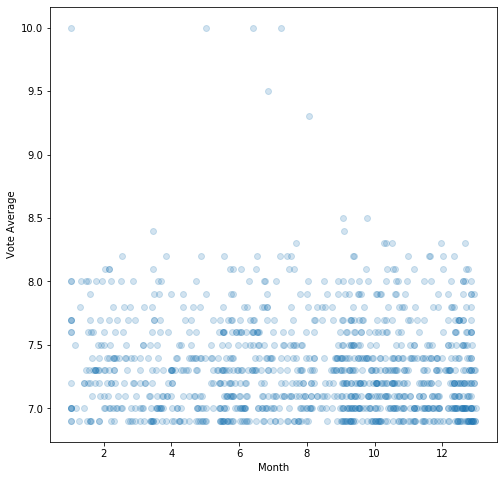

In [46]:
fig = plt.figure(figsize=(8,8))

plt.scatter(df.release_date.dt.month[index]
            + df.release_date.dt.day[index] / 30, 
            df.vote_average[index], alpha=0.2)
plt.xlabel("Month")
plt.ylabel("Vote Average")
plt.savefig("release_date_vs_vote_average.png")